Before this cell is about CHest-X-Det dataset, after this cell is about Mura.

---------------------------

*****
After this cell, you must run all cell

In [ ]:
#GLCM
#src:https://github.com/tzm030329/GLCM
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data


def main():
    pass


def fast_glcm(img, vmin=0, vmax=255, nbit=8, kernel_size=5):
    mi, ma = vmin, vmax
    ks = kernel_size
    h,w = img.shape

    # digitize
    bins = np.linspace(mi, ma+1, nbit+1)
    gl1 = np.digitize(img, bins) - 1
    gl2 = np.append(gl1[:,1:], gl1[:,-1:], axis=1)

    # make glcm
    glcm = np.zeros((nbit, nbit, h, w), dtype=np.uint8)
    for i in range(nbit):
        for j in range(nbit):
            mask = ((gl1==i) & (gl2==j))
            glcm[i,j, mask] = 1

    kernel = np.ones((ks, ks), dtype=np.uint8)
    for i in range(nbit):
        for j in range(nbit):
            glcm[i,j] = cv2.filter2D(glcm[i,j], -1, kernel)

    glcm = glcm.astype(np.float32)
    return glcm


def fast_glcm_mean(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm mean
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    mean = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            mean += glcm[i,j] * i / (nbit)**2

    return mean


def fast_glcm_std(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm std
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    mean = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            mean += glcm[i,j] * i / (nbit)**2

    std2 = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            std2 += (glcm[i,j] * i - mean)**2

    std = np.sqrt(std2)
    return std


def fast_glcm_contrast(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm contrast
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    cont = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            cont += glcm[i,j] * (i-j)**2

    return cont


def fast_glcm_dissimilarity(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm dissimilarity
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    diss = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            diss += glcm[i,j] * np.abs(i-j)

    return diss


def fast_glcm_homogeneity(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm homogeneity
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    homo = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            homo += glcm[i,j] / (1.+(i-j)**2)

    return homo


def fast_glcm_ASM(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm asm, energy
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    asm = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            asm  += glcm[i,j]**2

    ene = np.sqrt(asm)
    return asm, ene


def fast_glcm_max(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm max
    '''
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    max_  = np.max(glcm, axis=(0,1))
    return max_


def fast_glcm_entropy(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm entropy
    '''
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    pnorm = glcm / np.sum(glcm, axis=(0,1)) + 1./ks**2
    ent  = np.sum(-pnorm * np.log(pnorm), axis=(0,1))
    return ent


if __name__ == '__main__':
    main()

    nbit = 8
    ks = 5
    mi, ma = 0, 255

    img = data.camera()
    h,w = img.shape

    img[:,:w//2] = img[:,:w//2]//2+127
    glcm_mean = fast_glcm_mean(img, mi, ma, nbit, ks)

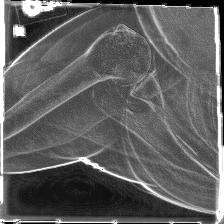

(224, 224, 3)


'plt.imshow(img)\nplt.tight_layout()\nplt.show()'

In [ ]:
#img = data.camera()
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
 
# To read image from disk, we use
# cv2.imread function, in below method,
img = cv2.imread("/content/drive/MyDrive/imageProcessing/mura/mura/trainImagesAfterPreprocess/32127_LA10.png", cv2.IMREAD_GRAYSCALE)
#img=Image.open("/content/drive/MyDrive/imageProcessing/mura/mura/trainImagesAfterPreprocess/32127_LA10.png")
h,w = img.shape
glcm_mean = fast_glcm_mean(img)
glcm_std = fast_glcm_std(img)
glcm_contrast = fast_glcm_contrast(img)
glcm_dissimilarity = fast_glcm_dissimilarity(img)
glcm_homogeneity=fast_glcm_homogeneity(img)
glcm_entropy = fast_glcm_entropy(img)
glcm_max = fast_glcm_max(img)
glcm_ASM=fast_glcm_ASM(img)
cv2_imshow(img+glcm_contrast)
img_bgr = cv2.cvtColor(glcm_contrast, cv2.COLOR_GRAY2BGR)
print(img_bgr.shape)
"""plt.imshow(img)
plt.tight_layout()
plt.show()"""

In [ ]:
#this is for trainImagePaths
import csv
from operator import length_hint 
file = open('/content/drive/MyDrive/imageProcessing/mura/mura/MURA-v1.1/train_image_paths.csv')

type(file)

csvreader = csv.reader(file)

header = []
header = next(csvreader)
header

rows = []
for row in csvreader:
        rows.append(row)
rows

trainImagePaths = rows
sizeTrainImages = length_hint(trainImagePaths)
print(sizeTrainImages)
print(trainImagePaths[0][0])

file1 = open("/content/drive/MyDrive/imageProcessing/mura/mura/MURA-v1.1/pathLog.txt","w")#write mode
file1.write(str(trainImagePaths))
file1.close()

36807
MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image2.png


In [ ]:
#this is for ImagePathswithLabels
import csv

file = open('/content/drive/MyDrive/imageProcessing/mura/mura/MURA-v1.1/train_labeled_studies.csv')

type(file)

csvreader = csv.reader(file)

header = []
header = next(csvreader)
header

rows = []
for row in csvreader:
        rows.append(row)
rows

trainImagePathWithLabels = rows;
size = length_hint(trainImagePathWithLabels)
print(size)
print(trainImagePathWithLabels)

13456
[['MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/', '1'], ['MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/', '1'], ['MURA-v1.1/train/XR_SHOULDER/patient00004/study1_positive/', '1'], ['MURA-v1.1/train/XR_SHOULDER/patient00005/study1_positive/', '1'], ['MURA-v1.1/train/XR_SHOULDER/patient00006/study1_positive/', '1'], ['MURA-v1.1/train/XR_SHOULDER/patient00007/study1_positive/', '1'], ['MURA-v1.1/train/XR_SHOULDER/patient00007/study2_negative/', '0'], ['MURA-v1.1/train/XR_SHOULDER/patient00008/study1_positive/', '1'], ['MURA-v1.1/train/XR_SHOULDER/patient00009/study1_positive/', '1'], ['MURA-v1.1/train/XR_SHOULDER/patient00010/study1_positive/', '1'], ['MURA-v1.1/train/XR_SHOULDER/patient00011/study1_positive/', '1'], ['MURA-v1.1/train/XR_SHOULDER/patient00012/study1_positive/', '1'], ['MURA-v1.1/train/XR_SHOULDER/patient00013/study1_positive/', '1'], ['MURA-v1.1/train/XR_SHOULDER/patient00014/study1_positive/', '1'], ['MURA-v1.1/train/XR_SHOULDER/patient0001

In [ ]:
#this is for validImagePaths
import csv

file = open('/content/drive/MyDrive/imageProcessing/mura/mura/MURA-v1.1/valid_image_paths.csv')

type(file)

csvreader = csv.reader(file)

header = []
header = next(csvreader)
header

rows = []
for row in csvreader:
        rows.append(row)
rows

validImagePaths = rows
sizeValidateImages = length_hint(validImagePaths)
print(sizeValidateImages)
print(validImagePaths[0][0])

3196
MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image2.png


In [ ]:
#this is for validImagePathsWithLabel
import csv

file = open('/content/drive/MyDrive/imageProcessing/mura/mura/MURA-v1.1/valid_image_paths.csv')

type(file)

csvreader = csv.reader(file)

header = []
header = next(csvreader)
header

rows = []
for row in csvreader:
        rows.append(row)
rows

validImagePathsWithLabel = rows
size = length_hint(validImagePathsWithLabel)
print(size)
print(validImagePathsWithLabel[0][0])

3196
MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image2.png


In [ ]:
#this cell for labeling the train images

i=0;
rows, cols = (sizeTrainImages, 2)
trainImagesPath = [0]*rows 
trainImagesLabel = [0]*rows 
for x in range(sizeTrainImages):
  #print(str(trainImagePaths[x][0])+" "+str(x))
  if str(trainImagePaths[x][0]).find("XR_HAND") != -1:
    if str(trainImagePaths[x][0]).find("positive") != -1:
      trainImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(trainImagePaths[x][0]);
      trainImagesLabel[x] = 5;
    elif str(trainImagePaths[x][0]).find("negative") != -1:
      trainImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(trainImagePaths[x][0]);
      trainImagesLabel[x] = 4;
    else:
      print("Wrong label");
      # do nothing
  elif str(trainImagePaths[x][0]).find("XR_ELBOW") != -1:
    if str(trainImagePaths[x][0]).find("positive") != -1:
      trainImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(trainImagePaths[x][0]);
      trainImagesLabel[x] = 1;
    elif str(trainImagePaths[x][0]).find("negative") != -1:
      trainImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(trainImagePaths[x][0]);
      trainImagesLabel[x] = 0;
    else:
      print("Wrong label");
      # do nothing
  elif str(trainImagePaths[x][0]).find("XR_FINGER") != -1:
    if str(trainImagePaths[x][0]).find("positive") != -1:
      trainImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(trainImagePaths[x][0]);
      trainImagesLabel[x] = 3;
    elif str(trainImagePaths[x][0]).find("negative") != -1:
      trainImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(trainImagePaths[x][0]);
      trainImagesLabel[x] = 2;
    else:
      print("Wrong label");
      # do nothing
  elif str(trainImagePaths[x][0]).find("XR_HUMERUS") != -1:
    if str(trainImagePaths[x][0]).find("positive") != -1:
      trainImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(trainImagePaths[x][0]);
      trainImagesLabel[x] = 7;
    elif str(trainImagePaths[x][0]).find("negative") != -1:
      trainImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(trainImagePaths[x][0]);
      trainImagesLabel[x] = 6;
    else:
      print("Wrong label");
      # do nothing
  elif str(trainImagePaths[x][0]).find("XR_FOREARM") != -1:
    if str(trainImagePaths[x][0]).find("positive") != -1:
      trainImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(trainImagePaths[x][0]);
      trainImagesLabel[x] = 9;
    elif str(trainImagePaths[x][0]).find("negative") != -1:
      trainImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(trainImagePaths[x][0]);
      trainImagesLabel[x] = 8;
    else:
      print("Wrong label");
      # do nothing
  elif str(trainImagePaths[x][0]).find("XR_SHOULDER") != -1:
    if str(trainImagePaths[x][0]).find("positive") != -1:
      trainImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(trainImagePaths[x][0]);
      trainImagesLabel[x] = 11;
    elif str(trainImagePaths[x][0]).find("negative") != -1:
      trainImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(trainImagePaths[x][0]);
      trainImagesLabel[x] = 10;
    else:
      print("Wrong label");
      # do nothing
  elif str(trainImagePaths[x][0]).find("XR_WRIST") != -1:
    if str(trainImagePaths[x][0]).find("positive") != -1:
      trainImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(trainImagePaths[x][0]);
      trainImagesLabel[x] = 13;
    elif str(trainImagePaths[x][0]).find("negative") != -1:
      trainImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(trainImagePaths[x][0]);
      trainImagesLabel[x] = 12;
    else:
      print("Wrong label");
      # do nothing"""
  else:
    print("Not found!")

  i=i+1;
#len=36807
len = 15978
print(trainImagePaths[len])
print(trainImagesLabel[len])
print(trainImagesPath[len])

['MURA-v1.1/train/XR_ELBOW/patient05230/study1_positive/image1.png']
1
/content/drive/MyDrive/imageProcessing/mura/mura/MURA-v1.1/train/XR_ELBOW/patient05230/study1_positive/image1.png


In [ ]:
#this cell for labeling the validation images

i=0;
rows, cols = (sizeValidateImages, 2)
validateImagesPath = [0]*rows 
validateImagesLabel = [0]*rows 
for x in range(sizeValidateImages):
  #print(str(validImagePaths[x][0])+" "+str(x))
  if str(validImagePaths[x][0]).find("XR_HAND") != -1:
    if str(validImagePaths[x][0]).find("positive") != -1:
      validateImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(validImagePaths[x][0]);
      validateImagesLabel[x] = 5;
    elif str(validImagePaths[x][0]).find("negative") != -1:
      validateImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(validImagePaths[x][0]);
      validateImagesLabel[x] = 4;
    else:
      print("Wrong label");
      # do nothing
  elif str(validImagePaths[x][0]).find("XR_ELBOW") != -1:
    if str(validImagePaths[x][0]).find("positive") != -1:
      validateImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(validImagePaths[x][0]);
      validateImagesLabel[x] = 1;
    elif str(validImagePaths[x][0]).find("negative") != -1:
      validateImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(validImagePaths[x][0]);
      validateImagesLabel[x] = 0;
    else:
      print("Wrong label");
      # do nothing
  elif str(validImagePaths[x][0]).find("XR_FINGER") != -1:
    if str(validImagePaths[x][0]).find("positive") != -1:
      validateImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(validImagePaths[x][0]);
      validateImagesLabel[x] = 3;
    elif str(validImagePaths[x][0]).find("negative") != -1:
      validateImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(validImagePaths[x][0]);
      validateImagesLabel[x] = 2;
    else:
      print("Wrong label");
      # do nothing
  elif str(validImagePaths[x][0]).find("XR_HUMERUS") != -1:
    if str(validImagePaths[x][0]).find("positive") != -1:
      validateImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(validImagePaths[x][0]);
      validateImagesLabel[x] = 7;
    elif str(validImagePaths[x][0]).find("negative") != -1:
      validateImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(validImagePaths[x][0]);
      validateImagesLabel[x] = 6;
    else:
      print("Wrong label");
      # do nothing
  elif str(validImagePaths[x][0]).find("XR_FOREARM") != -1:
    if str(validImagePaths[x][0]).find("positive") != -1:
      validateImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(validImagePaths[x][0]);
      validateImagesLabel[x] = 9;
    elif str(validImagePaths[x][0]).find("negative") != -1:
      validateImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(validImagePaths[x][0]);
      validateImagesLabel[x] = 8;
    else:
      print("Wrong label");
      # do nothing
  elif str(validImagePaths[x][0]).find("XR_SHOULDER") != -1:
    if str(validImagePaths[x][0]).find("positive") != -1:
      validateImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(validImagePaths[x][0]);
      validateImagesLabel[x] = 11;
    elif str(validImagePaths[x][0]).find("negative") != -1:
      validateImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(validImagePaths[x][0]);
      validateImagesLabel[x] = 10;
    else:
      print("Wrong label");
      # do nothing
  elif str(validImagePaths[x][0]).find("XR_WRIST") != -1:
    if str(validImagePaths[x][0]).find("positive") != -1:
      validateImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(validImagePaths[x][0]);
      validateImagesLabel[x] = 13;
    elif str(validImagePaths[x][0]).find("negative") != -1:
      validateImagesPath[x] = "/content/drive/MyDrive/imageProcessing/mura/mura/"+str(validImagePaths[x][0]);
      validateImagesLabel[x] = 12;
    else:
      print("Wrong label");
      # do nothing"""
  else:
    print("Not found!")

  i=i+1;
#len=3196
len = 300
print(validImagePaths[len])
print(validateImagesLabel[len])
print(validateImagesPath[len])

['MURA-v1.1/valid/XR_WRIST/patient11269/study1_positive/image1.png']
13
/content/drive/MyDrive/imageProcessing/mura/mura/MURA-v1.1/valid/XR_WRIST/patient11269/study1_positive/image1.png


In [ ]:
# split a dataset into train and test sets

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

rows, cols = (sizeTrainImages, 2)
testImagesPath = [0]*rows 
testImagesLabel = [0]*rows 

X_train, X_test, Y_train, Y_test = train_test_split(trainImagesPath, trainImagesLabel, test_size=0.10)

sizeX_train = length_hint(X_train)
print("train data size :" +str(sizeX_train))

sizeX_test = length_hint(X_test)
print("test data size : " + str(sizeX_test))

sizeY_train = length_hint(Y_train)
print(sizeY_train)

sizeY_test = length_hint(Y_test)
print(sizeY_test)

print(X_train[0])

train data size :33126
test data size : 3681
33126
3681
/content/drive/MyDrive/imageProcessing/mura/mura/MURA-v1.1/train/XR_ELBOW/patient05578/study1_negative/image2.png


After that cell, dataset operation is completed.


---


Train Size:  33126  (sizeX_train,  sizeY_train)


---


Test Size:  3681  (sizeX_test,  sizeY_test)


---


Validation Size:  3196 (sizeValidateImages)

/content/drive/MyDrive/imageProcessing/mura/mura/MURA-v1.1/train/XR_HAND/patient01972/study1_negative/image1.png
4
(512, 352, 3)


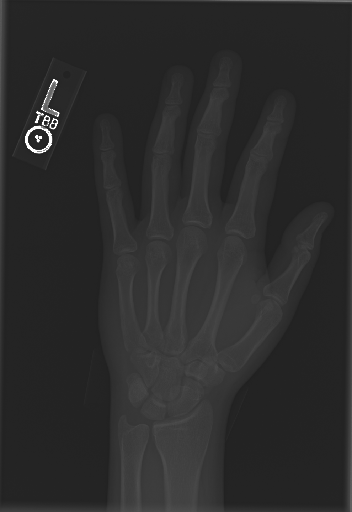

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import cv2 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt

rank=3000;
print(X_train[rank])
image = cv2.imread(X_train[rank])
print(Y_train[rank])
print(image.shape)
cv2_imshow(image)

In [ ]:
#for train data preprocessing function
from PIL import Image
import numpy as np
import pandas as pd
import cv2 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt
import cv2
import numpy as np
def trainPreprocessImages(path,i):
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (224, 224))
    #print(image.shape)
    
    #using image sharpen filter
    kernel = np.array([[0, -1, 0],
                        [-1, 5,-1],
                        [0, -1, 0]])
    sharperKernelFilter = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    """
    #laplacian edge detection 
    kernel = np.array([[0, -1, 0],
                    [-1, 4,-1],
                    [0, -1, 0]])
    laplacianEdgeDetectorX1= cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    """
    #sobel edge detection in x axis
    kernel = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
    sobelEdgeForX = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

    #sobel edge detection in y axis
    kernel = np.array([[1, 2, 1],
                    [0 , 0, 0],
                    [-1, -2, -1]])
    sobelEdgeForY = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    
    img = sobelEdgeForX+sobelEdgeForY+sharperKernelFilter
    
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    bgr = cv2.cvtColor(cl1, cv2.COLOR_GRAY2BGR)
    glcm_contrast = fast_glcm_contrast(cl1)
    img_bgr = cv2.cvtColor(glcm_contrast, cv2.COLOR_GRAY2BGR)
    #cv2_imshow(cl1)
    cv2_imshow(cl1+glcm_contrast)
    """for hand
    cv2.imwrite("/content/drive/MyDrive/imageProcessing/mura/mura/trainImagesAfterPreprocess2/"+str(i)+"_LA"+str(Y_train[i])+".png",cl1+glcm_contrast)
    """
    """for presentation
    cv2.imwrite("/content/drive/MyDrive/imageProcessing/mura/mura/trainImagesAfterPreprocessForWrist/"+str(i)+"_LA"+str(Y_train[i])+".png",cl1+glcm_contrast)
    """



/content/drive/MyDrive/imageProcessing/mura/mura/MURA-v1.1/train/XR_HAND/patient01972/study1_negative/image1.png


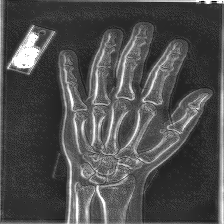

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import cv2 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt

rank=3000;
print(X_train[rank])
trainPreprocessImages(X_train[rank],0)


In [ ]:
trainDataImage = np.zeros((sizeX_train,224,224,3),dtype=np.uint8)
trainDataLabel = np.zeros((sizeY_train),dtype=np.uint8)
validationDataImage = np.zeros((sizeValidateImages,224,224,3),dtype=np.uint8)
validationDataLabel = np.zeros((sizeValidateImages),dtype=np.uint8)
testDataImage = np.zeros((sizeX_test,224,224,3),dtype=np.uint8)
testDataLabel = np.zeros((sizeY_test),dtype=np.uint8)

for x in range(sizeX_train):
  trainDataImage[x]=trainPreprocessImages(X_train[x],x)
  trainDataLabel[x]=Y_train[x]
  print(x)

for x in range(sizeValidateImages):
  validationDataImage[x]=trainPreprocessImages(validateImagesPath[x],x)
  validationDataLabel[x]=validateImagesLabel[x]
  print(x)

for x in range(sizeX_test):
  trainDataImage[x]=trainPreprocessImages(X_test[x],x)
  testDataLabel[x]=Y_test[x]
  print(x)

We have tried some thresholding methods for the images. However we can not get good images. 

In [ ]:
trainPreprocessImages(X_train[0],0)
trainPreprocessImages(X_train[1],1)
trainPreprocessImages(X_train[2],2)


In [ ]:
#saving images to directory
from numpy import asarray ,newaxis
import numpy as np

for x in range(sizeX_train):
  if (X_train[x].find("XR_WRIST") != -1):
    trainPreprocessImages(X_train[x],x)
  print(x)
#saving picture

Streaming output truncated to the last 5000 lines.
28126
28127
28128
28129
28130
28131
28132
28133
28134
28135
28136
28137
28138
28139
28140
28141
28142
28143
28144
28145
28146
28147
28148
28149
28150
28151
28152
28153
28154
28155
28156
28157
28158
28159
28160
28161
28162
28163
28164
28165
28166
28167
28168
28169
28170
28171
28172
28173
28174
28175
28176
28177
28178
28179
28180
28181
28182
28183
28184
28185
28186
28187
28188
28189
28190
28191
28192
28193
28194
28195
28196
28197
28198
28199
28200
28201
28202
28203
28204
28205
28206
28207
28208
28209
28210
28211
28212
28213
28214
28215
28216
28217
28218
28219
28220
28221
28222
28223
28224
28225
28226
28227
28228
28229
28230
28231
28232
28233
28234
28235
28236
28237
28238
28239
28240
28241
28242
28243
28244
28245
28246
28247
28248
28249
28250
28251
28252
28253
28254
28255
28256
28257
28258
28259
28260
28261
28262
28263
28264
28265
28266
28267
28268
28269
28270
28271
28272
28273
28274
28275
28276
28277
28278
28279
28280
28281
28282
28283
2

In [ ]:
#save the image path for comperison train
f = open("/content/drive/MyDrive/imageProcessing/mura/mura/trainImagesAfterPreprocess/datasetPath.txt", "w")
f.write(str(X_train))
f.close()
#saving txt

In [ ]:
#for test data preprocessing functions
from PIL import Image
import numpy as np
import pandas as pd
import cv2 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt
import cv2
import numpy as np

def testPreprocessImages(path,i):
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (224, 224))
    #print(image.shape)
    
    #using image sharpen filter
    kernel = np.array([[0, -1, 0],
                        [-1, 5,-1],
                        [0, -1, 0]])
    sharperKernelFilter = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    """
    #laplacian edge detection 
    kernel = np.array([[0, -1, 0],
                    [-1, 4,-1],
                    [0, -1, 0]])
    laplacianEdgeDetectorX1= cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    """
    #sobel edge detection in x axis
    kernel = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
    sobelEdgeForX = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

    #sobel edge detection in y axis
    kernel = np.array([[1, 2, 1],
                    [0 , 0, 0],
                    [-1, -2, -1]])
    sobelEdgeForY = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    
    img = sobelEdgeForX+sobelEdgeForY+sharperKernelFilter
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    glcm_contrast = fast_glcm_contrast(cl1)
    bgr = cv2.cvtColor(cl1, cv2.COLOR_GRAY2BGR)
    """this is for hand
    cv2.imwrite("/content/drive/MyDrive/imageProcessing/mura/mura/testImagesAfterPreprocess2/"+str(i)+"_LA"+str(Y_test[i])+".png",cl1+glcm_contrast)
    """
    #for wrist
    cv2.imwrite("/content/drive/MyDrive/imageProcessing/mura/mura/testImagesAfterPreprocessForWrist/"+str(i)+"_LA"+str(Y_test[i])+".png",cl1+glcm_contrast)


In [ ]:
#saving test images to directory
from numpy import asarray ,newaxis
import numpy as np

for x in range(sizeX_test):
  if (X_test[x].find("XR_WRIST") != -1):
    testPreprocessImages(X_test[x],x)
  print(x)
#saving test picture

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
#save the image path for comperison test
f = open("/content/drive/MyDrive/imageProcessing/mura/mura/testImagesAfterPreprocess/datasetPath.txt", "w")
f.write(str(X_test))
f.close()
#saving text log

In [ ]:
#for validate data preprocessing function
from PIL import Image
import numpy as np
import pandas as pd
import cv2 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt
import cv2
import numpy as np

def validatePreprocessImages(path,i):
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (224, 224))
    #print(image.shape)
    
    #using image sharpen filter
    kernel = np.array([[0, -1, 0],
                        [-1, 5,-1],
                        [0, -1, 0]])
    sharperKernelFilter = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    """
    #laplacian edge detection 
    kernel = np.array([[0, -1, 0],
                    [-1, 4,-1],
                    [0, -1, 0]])
    laplacianEdgeDetectorX1= cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    """
    #sobel edge detection in x axis
    kernel = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
    sobelEdgeForX = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

    #sobel edge detection in y axis
    kernel = np.array([[1, 2, 1],
                    [0 , 0, 0],
                    [-1, -2, -1]])
    sobelEdgeForY = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    
    img = sobelEdgeForX+sobelEdgeForY+sharperKernelFilter
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    glcm_contrast = fast_glcm_contrast(cl1)
    bgr = cv2.cvtColor(cl1, cv2.COLOR_GRAY2BGR)
    """for hand
    cv2.imwrite("/content/drive/MyDrive/imageProcessing/mura/mura/validateImagesAfterPreprocess2/"+str(i)+"_LA"+str(validateImagesLabel[i])+".png",cl1+glcm_contrast)
    """

    #for wrist
    cv2.imwrite("/content/drive/MyDrive/imageProcessing/mura/mura/validateImagesAfterPreprocessForWrist/"+str(i)+"_LA"+str(validateImagesLabel[i])+".png",cl1+glcm_contrast)


#validateImagesPath

In [ ]:
#saving validation images to directory
from numpy import asarray ,newaxis
import numpy as np
sizeValidation = 3196
for x in range(sizeValidation):
  if (validateImagesPath[x].find("XR_WRIST") != -1):
    validatePreprocessImages(validateImagesPath[x],x)
  print(x)
#saving validate picture

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
#save the image path for comperison validations
f = open("/content/drive/MyDrive/imageProcessing/mura/mura/validateImagesAfterPreprocess/datasetPath.txt", "w")
f.write(str(validateImagesPath))
f.close()
#saving validate txt

In [ ]:
# import OS module
import os

# Get the list of all files and directories
path = "/content/drive/MyDrive/imageProcessing/mura/mura/trainImagesAfterPreprocess"
dir_listTrain = os.listdir(path)

path = "/content/drive/MyDrive/imageProcessing/mura/mura/testImagesAfterPreprocess"
dir_listTest = os.listdir(path)

path = "/content/drive/MyDrive/imageProcessing/mura/mura/validateImagesAfterPreprocess"
dir_listValidation = os.listdir(path)


# prints all train files
print(dir_listTrain)

# prints all test files
print(dir_listTest)

# prints all validation files
print(dir_listValidation)




Files and directories in ' /content/drive/MyDrive/imageProcessing/mura/mura/trainImagesAfterPreprocess ' :
['32127_LA10.png', '32128_LA10.png', '32129_LA12.png', '32130_LA5.png', '32131_LA13.png', '32132_LA13.png', '32133_LA13.png', '32134_LA11.png', '32135_LA10.png', '32136_LA3.png', '32137_LA2.png', '32138_LA5.png', '32139_LA11.png', '32140_LA6.png', '32141_LA10.png', '32142_LA10.png', '32143_LA2.png', '32144_LA5.png', '32145_LA1.png', '32146_LA13.png', '32147_LA0.png', '32148_LA10.png', '32149_LA11.png', '32150_LA0.png', '32151_LA5.png', '32152_LA12.png', '32153_LA2.png', '32154_LA9.png', '32155_LA4.png', '32156_LA2.png', '32157_LA2.png', '32158_LA7.png', '32159_LA0.png', '32160_LA0.png', '32161_LA0.png', '32162_LA11.png', '32163_LA11.png', '32164_LA13.png', '32165_LA12.png', '32166_LA4.png', '32167_LA12.png', '32168_LA3.png', '32169_LA7.png', '32170_LA12.png', '32171_LA4.png', '32172_LA8.png', '32173_LA11.png', '32174_LA8.png', '32175_LA10.png', '32176_LA1.png', '32177_LA8.png', '3

In [ ]:
print(dir_listTrain[0])

32127_LA10.png


In [ ]:
from numpy import asarray ,newaxis
import numpy as np
#for train data preprocessing function
from PIL import Image
import numpy as np
import pandas as pd
import cv2 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt
import cv2
import numpy as np

trainDataSizeAfterPreprocess = len(dir_listTrain)

trainDataImage = np.zeros((trainDataSizeAfterPreprocess,224,224,3),dtype=np.uint8)
trainDataLabel = np.zeros((trainDataSizeAfterPreprocess),dtype=np.uint8)
for x in range(trainDataSizeAfterPreprocess):
  trainDataImage[x] = cv2.imread("/content/drive/MyDrive/imageProcessing/mura/mura/trainImagesAfterPreprocess/"+str(dir_listTrain[x]))

  if(dir_listTrain[x].find("_LA14")):
    trainDataLabel[x]=14
  elif(dir_listTrain[x].find("_LA13")):
    trainDataLabel[x]=13
  elif(dir_listTrain[x].find("_LA12")):
    trainDataLabel[x]=12
  elif(dir_listTrain[x].find("_LA11")):
    trainDataLabel[x]=11
  elif(dir_listTrain[x].find("_LA10")):
    trainDataLabel[x]=10
  elif(dir_listTrain[x].find("_LA9")):
    trainDataLabel[x]=9
  elif(dir_listTrain[x].find("_LA8")):
    trainDataLabel[x]=8
  elif(dir_listTrain[x].find("_LA7")):
    trainDataLabel[x]=7
  elif(dir_listTrain[x].find("_LA6")):
    trainDataLabel[x]=6
  elif(dir_listTrain[x].find("_LA5")):
    trainDataLabel[x]=5
  elif(dir_listTrain[x].find("_LA4")):
    trainDataLabel[x]=4
  elif(dir_listTrain[x].find("_LA3")):
    trainDataLabel[x]=3
  elif(dir_listTrain[x].find("_LA2")):
    trainDataLabel[x]=2
  elif(dir_listTrain[x].find("_LA1")):
    trainDataLabel[x]=1
  elif(dir_listTrain[x].find("_LA0")):
    trainDataLabel[x]=0
  else:
    print("Label Problem")
  print(str(x)+" "+str(trainDataImage[x].shape))



NameError: ignored

In [ ]:
testDataImage = np.zeros((sizeX_test,224,224,3),dtype=np.uint8)
testDataLabel = np.zeros((sizeX_test),dtype=np.uint8)
validateDataImage = np.zeros((sizeValidateImages,224,224,3),dtype=np.uint8)
validateDataLabel = np.zeros((sizeValidateImages),dtype=np.uint8)

(224, 224)
(224, 224, 3)
<class 'numpy.ndarray'>
(224, 224, 3)
(224, 224, 1, 3)
<class 'numpy.ndarray'>
(224, 224, 3)


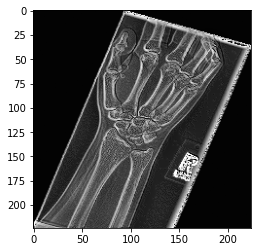

In [ ]:
from numpy import asarray ,newaxis
import numpy as np
rank=1000
image = trainPreprocessImages(X_train[rank])
data = asarray(image)
  
# <class 'numpy.ndarray'>

print(type(data))
  
#  shape
print(data.shape)
data = data[:, :, newaxis]

#  shape
print(data.shape)

data = np.array(data, dtype="float32") / 255.0
print(type(data))
image = data.squeeze()
#plt.title('Example %d. Label: %d' % (1, train['labels'][position]))
plt.imshow(image, cmap=plt.cm.gray_r)
print(image.shape)

In [ ]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")


In [ ]:
model = tf.keras.applications.DenseNet169(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(224,224,1),
    pooling=None,
    classes=1000
)

In [ ]:
model.summary()

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 1)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  3136        ['zero_padding2d_2[0][0]']       
                                )                                                       

In [ ]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(224,224,1), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(14, activation='softmax') #Output layer
])

In [ ]:
lenet_5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 6)       156       
                                                                 
 average_pooling2d_2 (Averag  (None, 112, 112, 6)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 108, 108, 16)      2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 54, 54, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 120)       48120     
                                                                 
 flatten_1 (Flatten)         (None, 300000)           

In [ ]:
#optimizer ada's parameter is set
ada = tf.keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95, epsilon=1e-08)

#model compile parameters is set
model.compile(optimizer=ada,
              loss=tf.keras.losses.mean_squared_error,
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(xtrain, ytrain,
               steps_per_epoch=xtrain.shape[0] //128,
               epochs=50,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(xtrain, ytrain))